# Characterization

## Setup

In [1]:
import sys
import math
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

def load_data(dataset_name):
    # Read the data and create the dataframe.
    df = pd.DataFrame(pd.read_csv(dataset_name, encoding='utf-8', sep=","))

    # Convert the 'timestamp' column to date format.
    df['date'] = pd.to_datetime(df['date'], errors="raise")
    df['weekday'] = df['date'].dt.weekday
    
    df.drop('day', axis = 1, inplace = True)
    df.drop('isweekend', axis = 1, inplace = True)
    
    return df.sort_values('date')


In [2]:
df = load_data("data/Vancouver2017Full.csv")

In [3]:
df.head()

,date,weekday,hourofday,periodofday,weather
0,2017-01-01,6,12,4,3
1001,2017-01-01,6,18,6,3
1000,2017-01-01,6,18,6,3
999,2017-01-01,6,18,6,3
998,2017-01-01,6,18,6,3


## Basic Info

In [4]:
# Total number of bookings.
len(df)

1055980

In [5]:
# Period covered by the data
max(df['date']) - min(df['date'])

Timedelta('364 days 00:00:00')

In [6]:
# Number of days for which there are bookings
len(df.groupby(['date']))

229

## Number of Bookings in the Whole Period

In [7]:
df_bookings_whole_period = df.groupby(df["date"])['date'].count()
df_bookings_whole_period.head()

date
2017-01-01    1493
2017-01-02    2358
2017-01-03    3019
2017-01-04    3294
2017-01-05    3656
Name: date, dtype: int64

/Users/douglas/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:102: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


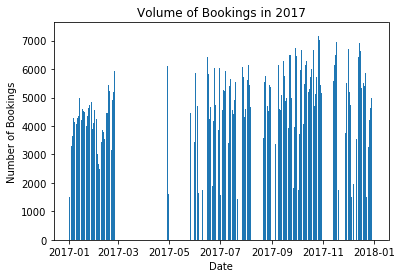

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.cbook as cbook

fig, ax = plt.subplots()
ax.bar(df_bookings_whole_period.index, df_bookings_whole_period.values)

ax.set_xlabel('Date')
ax.set_ylabel('Number of Bookings')
ax.set_title('Volume of Bookings in 2017')

# Save chart.
plt.savefig('charts/BookingsWholePeriod.pdf', dpi = 200)

plt.show()

## Number of bookings per month

In [9]:
import calendar
df_bookings_month = df.groupby(df["date"].dt.month)['date'].count()
df_bookings_month

date
1     128592
2      92503
4      17483
5       9642
6     106165
7     120036
8      90005
9     130637
10    169868
11     60005
12    131044
Name: date, dtype: int64

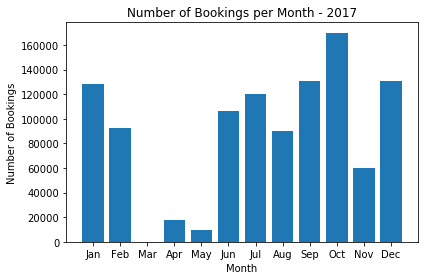

In [10]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
pos = [i + 1 for i, _ in enumerate(months)]

# the histogram of the data
fig, ax = plt.subplots()
ax.bar(df_bookings_month.index, df_bookings_month.values)
ax.set_xlabel('Month')
ax.set_ylabel('Number of Bookings')
ax.set_title('Number of Bookings per Month - 2017')
plt.xticks(pos, months)

# Tweak spacing to prevent clipping of ylabel
fig.tight_layout()

# Save chart.
plt.savefig('charts/BookingsMonth.pdf', dpi = 200)

plt.show()

## Average Number of Bookings per Weekday

In [11]:
weekly_data = [[] for _ in range(7)]
for name, group in df.groupby(pd.Grouper(key='date',freq='W')):
    if len(group) > 0:
        for n, g in group.groupby('weekday'):
            weekly_data[n].append(len(g))

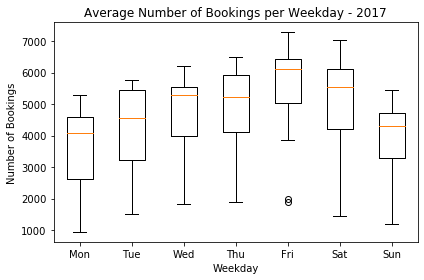

In [12]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

weekdays = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
pos = [i + 1 for i, _ in enumerate(weekdays)]

# the histogram of the data
fig, ax = plt.subplots()
ax.boxplot(weekly_data, notch=0, vert=1, whis=1.5)
ax.set_xlabel('Weekday')
ax.set_ylabel('Number of Bookings')
ax.set_title('Average Number of Bookings per Weekday - 2017')
plt.xticks(pos, weekdays)

# Tweak spacing to prevent clipping of ylabel
fig.tight_layout()

# Save chart.
plt.savefig('charts/AverageBookingsWeekday.pdf', dpi = 200)

plt.show()

## Average Number of Bookings per Hour of the Day

In [13]:
hourly_data = [[] for _ in range(24)]
for name, group in df.groupby(pd.Grouper(key='date',freq='D')):
    if len(group) > 0:
        for n, g in group.groupby('hourofday'):
            hourly_data[n].append(len(g))

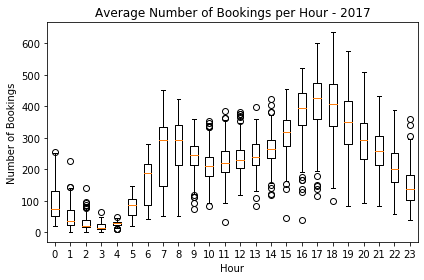

In [14]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

# the histogram of the data
fig, ax = plt.subplots()
ax.boxplot(hourly_data, notch=0, vert=1, whis=1.5)
ax.set_xlabel('Hour')
ax.set_ylabel('Number of Bookings')
ax.set_title('Average Number of Bookings per Hour - 2017')
plt.xticks([i + 1 for i in list(range(24))], list(range(24)))

# Tweak spacing to prevent clipping of ylabel
fig.tight_layout()

# Save chart.
plt.savefig('charts/AverageBookingsHour.pdf', dpi = 200)

plt.show()

## Average Number of Bookings per Period of the Day

In [15]:
periodic_data = [[] for _ in range(7)]
for name, group in df.groupby(pd.Grouper(key='date',freq='D')):
    if len(group) > 0:
        for n, g in group.groupby('periodofday'):
            periodic_data[n - 1].append(len(g))

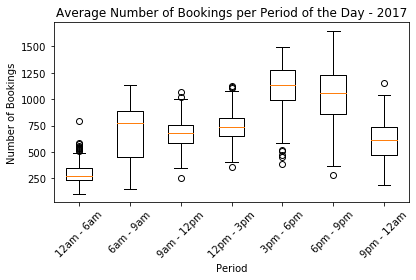

In [16]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

periods = ['12am - 6am', '6am - 9am', '9am - 12pm', '12pm - 3pm', '3pm - 6pm', '6pm - 9pm', '9pm - 12am']
pos = [i + 1 for i, _ in enumerate(periods)]


# the histogram of the data
fig, ax = plt.subplots()
ax.boxplot(periodic_data, notch=0, vert=1, whis=1.5)
ax.set_xlabel('Period')
ax.set_ylabel('Number of Bookings')
ax.set_title('Average Number of Bookings per Period of the Day - 2017')
plt.xticks(pos, periods)
plt.setp(ax.xaxis.get_ticklabels(),rotation=45)

# Tweak spacing to prevent clipping of ylabel
fig.tight_layout()

# Save chart.
plt.savefig('charts/AverageBookingsPeriod.pdf', dpi = 200)

plt.show()